# 오차역전파법

* 신경망 학습에서 가중치 가중치 매개변수에 대한 손실함수의 기울기를 수치 미분을 사용했다.
* 수치 미분은 단순하고 구현하기 쉽지만 계산 시간이 오래 걸린다.
* 가중치 매개변수의 기울기를 효율적으로 계산하는 방법이 오차역전파법이다.

## 5.1. 계산 그래프

**계산 그래프**는 계산과정을 그래프로 나타낸 것. 복수의 노드와 에지로 표현된다.

### 5.1.1. 계산 그래프로 풀다

문제: 사과 2개를 샀을 때의 지불 금액을 구하라.
현빈이는 사과 2개를 샀고, 사과 한 개에 100원이다. 소비세가 10% 부과된다고 할 때 지불 금액을 구하라.

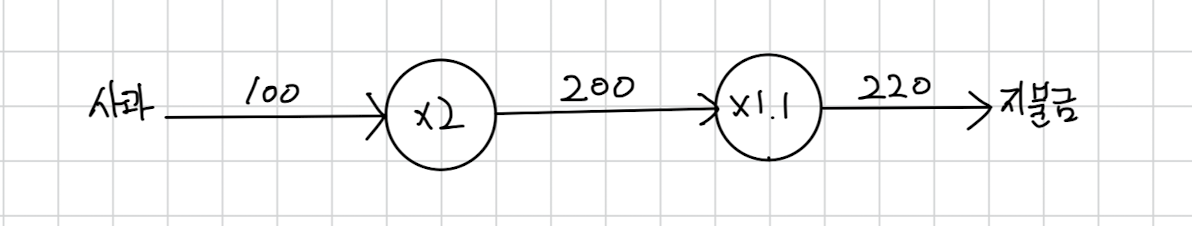


변수로 취급해서 계산 그래프로 나타내면 다음과 같다.

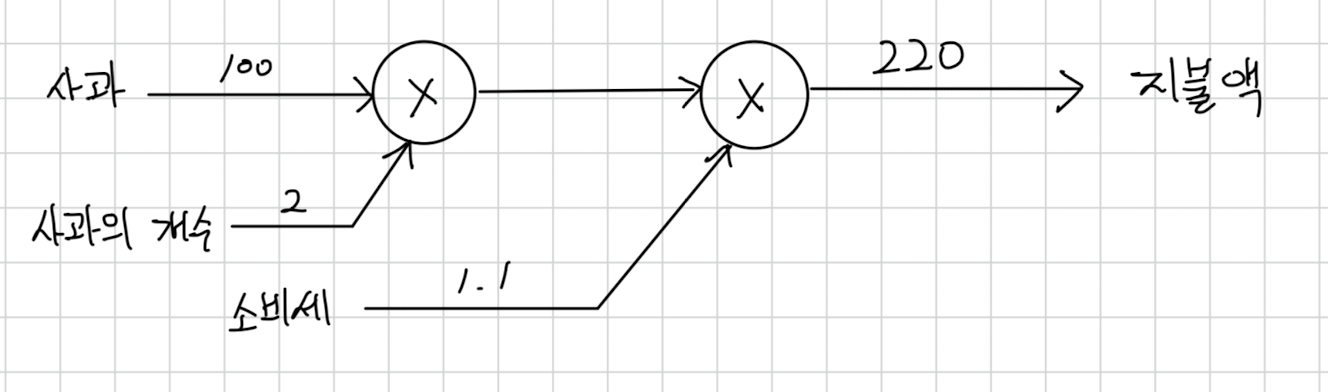

**문제2**
* 현빈 군은 슈퍼에서 사과를 2개, 귤을 3개 샀다.
* 사과는 1개에 100원, 귤은 1개에 150원이다.
* 소비세는 10%이다. 지불 금액을 구하라.

```mermaid
graph LR
  A[사과]
  B[귤]
  C[사과의 개수]
  D[귤의 개수]
  T[소비세]
  R[지불금액]

  x1((x))
  x2((x))
  x3((x))

  s1((+))

  A -->|100| x1
  C -->|2| x1

  B -->|150| x2
  D -->|3| x2

  x1 -->|200| s1
  x2 -->|450| s1

  s1 -->|650| x3
  T -->|1.1| x3
  x3 -->|715| R

```

**순전파 역전파**

```mermaid
graph LR
  x[x]
  y[y]
  f((f))

x -->|x| f
f -->|y| y
y -->|E| f
f -->|E*ay/ax|x
```

계산그래프에서 계산을 왼쪽에서 오른쪽으로 진행하는 단계를 **순전파**라고 한다.

그 반대로 오른쪽에서 왼쪽으로 진행하는 단계를 **역전파**라고 한다.

**역전파 계산 절차**
* 신호E에 노드의 국소적 미분$\frac{\partial f}{\partial x}$을 곱한 값을 다음 노드로 전달한다.
* 국소적 미분은 순전파 때의 $y=f(x)$ 계산의 미분을 구한다는 거다, 이는 $x$에 대한 $y$의 미분$\frac{\partial y}{\partial x}$을 구하는 것이다.
* $y=f(x)=x^2$의 미분은 $\frac{\partial y}{\partial x}=2x$이다, 따라서 $E\frac{\partial f}{\partial x}$를 상류에 전달하는 것이다.

### 5.1.2. 국소적 계산

계산 그래프의 특징은 국소적 계산을 전파함으로써 최종 결과를 얻는다는 것이다.

국소적이란 자신과 직접 관계된 작은 범위라는 뜻이다.



### 5.1.3. 왜 계산 그래프로 푸는가?

**계산 그래프의 이점**

* 전체 계산이 아무리 복잡하더라도 각 노드에서의 계산은 단순한 계산으로 이루어진다.
* 중간 계산 결과를 모두 보관할 수 있다.

## 5.2. 연쇄법칙

역전파는 국소적인 미분을 순방향과는 반대 방향으로 전파하는 것이다. 이때 '국소적 미분'을 전달하는 원리가 **연쇄법칙**이다.


### 5.2.1. 계산 그래프의 역전파

역전파의 계산 절차는 다음과 같다.

$y=f(x)$라는 계산의 역전파는 $y$에 대한 $x$의 미분을 구하는 것이다.

신호 E에 노드의 국소적 미분($\frac{\partial y}{\partial x}$)을 곱한 후 다음 노드로 전달한다.



### 5.2.2. 연쇄법칙이란?

*합성 함수*란 여러 함수로 구성된 함수를 말한다. $z = (x + y)^2$라는 식은 $z = t^2$와 $t = x + y$라는 두 개의 식으로 구성된다.

> 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.

$$
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x}
$$

다음은 미분 $\frac{\partial z}{\partial t}$의 국소적 미분(편미분)을 구한다.

$$
\frac{\partial z}{\partial t} = 2t
$$
$$
\frac{\partial t}{\partial x} = 1
$$


$\frac{\partial z}{\partial t}$는 $2t$이고, $\frac{\partial t}{\partial x}$는 1이므로

$$
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x} = 2t \cdot 1 = 2(x + y)
$$


### 5.2.3. 연쇄법칙과 계산 그래프

계산 그래프의 역전파는 연쇄법칙에 따라 각 노드에서의 미분을 곱한다.

2제곱 계산을 `**2`로 표시하고, 덧셈 계산을 `+`로 표시하면 다음과 같다.




## 5.3. 역전파

계산 그래프의 역전파가 연쇄법칙에 따라 진행된다.


### 5.3.1. 덧셈 노드의 역전파

덧셈 노드의 연전파법 $z=x+y$라고 하면, 미분은 다음과 같다.

$$
\frac{\partial z}{\partial x} = 1
$$
$$
\frac{\partial z}{\partial y} = 1
$$

식에서 $\frac{\partial z}{\partial x}$와 $\frac{\partial z}{\partial y}$는 모두 1이 된다.

$$

$$

### 5.3.2. 곱셈 노드의 역전파

$z=xy$라고 하면, 미분은 다음과 같다.

$$
\frac{\partial z}{\partial x} = y
$$
$$
\frac{\partial z}{\partial y} = x
$$

곱셈 노드 역전파는 상류의 값에 순전파 때의 입력 신호들을 '서로 바꾼 값'을 곱해서 하류로 보낸다.

서로 바꾼 값이란 순전파 때 x였다면 역전파에서는 y가 되고, y였다면 x가 된다.

### 5.3.3. 사과 쇼핑의 예

곱셈 노드의 역전파에서는 입력신호를 서로 바꿔서 하류로 보낸다.

사과 가격의 미분은 2.2, 사과 개수의 미분은 110이다. 소비세 미분은 200이다.

이는 사과 가격이 같은 양만큼 오르면 최종 금액에는 소비세가 200의 크기로, 사과 가격이 2.2의 크기로 반영된다는 뜻이다.

## 5.4. 단순한 계층 구현하기

사과 쇼핑의 계산 그래프를 파이썬으로 구현해보자.

### 5.4.1. 곱셈 계층

모든 계층은 forward()와 backward()라는 메서드를 가진다.

In [ ]:
class MulLayer:
  def __init__(self):
    self.x = None
    self.y = None
    
  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y
    return out
  
  def backward(self, dout):
    dx = dout * self.y # xとyをひっくり返す
    dy = dout * self.x # xとyをひっくり返す
    return dx, dy

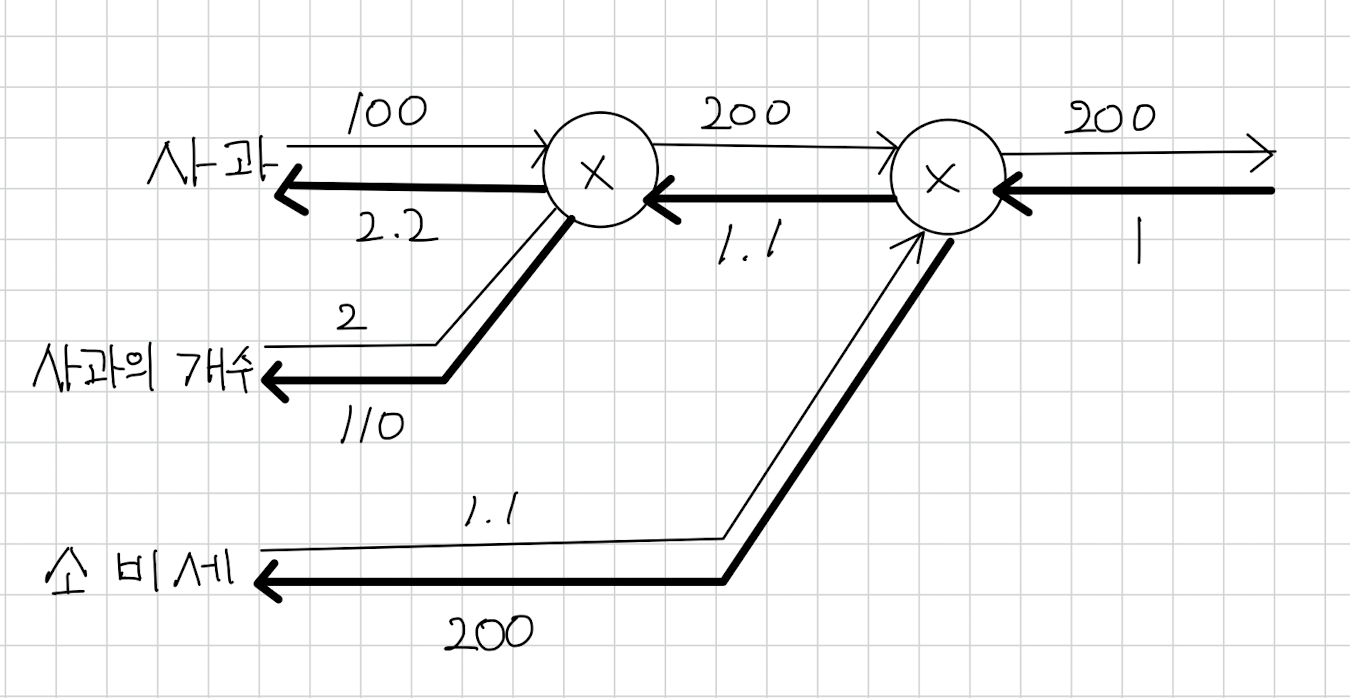

`__init__()`에서는 인스턴스 변수인 x와 y를 초기화한다.

이 두 변수는 순전파 시의 입력값을 유지하기 위해 사용한다.

`forward()`에서는 입력받은 x와 y를 곱해서 반환한다.

`backward()`에서는 상류에서 넘어온 미분(dout)에 순전파 때의 값을 서로 바꿔 곱한 후 하류로 흘린다.

In [16]:
# 순전파
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(int(price))

220


각 변수에 대한 미분은 `backward()`에서 구할 수 있다.

In [17]:
# 역전파

dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


`backward()`호출 순서는 `forward()`때와는 반대이다.

`backward()`가 받은 인수는 `순전파의 출력에 대한 미분`임에 주의하자.

mul_apple_layer라는 곱셈 계층은 순전파 때는 apple_price를 추력하지만, 역전파 때는 apple_price의 미분 값인 dapple_price를 인수로 받는다.


### 5.4.2. 덧셈 계층

In [18]:
class AddLayer:
  def __init__(self):
    pass
  
  def forward(self, x, y):
    out = x + y
    return out
  
  def backward(self, dout):
    dx = dout * 1
    dy = dout * 1
    return dx, dy


덧셈 계층은 초기화가 필요없다.

덧셈 계층의`forward()`에서는 입력 받은 두 인수 x, y를 더해서 반환한다.

`backward()`에서는 상류에서 넘어온 미분(dout)을 그대로 하류로 흘린다.

In [19]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(int(dapple_num), dapple, int(dorange), dorange_num, dtax)

715.0000000000001
110 2.2 3 165.0 650


**덧셈 계층과 곱셈 계층의 계산 그래프**
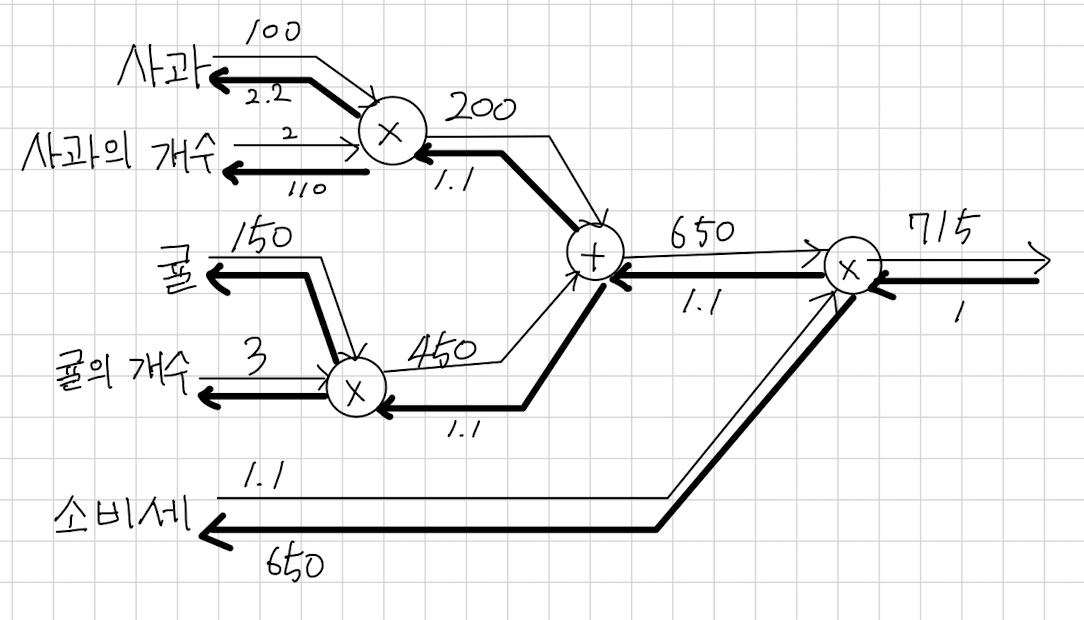

## 5.5. 활성화 함수 계층 구현하기

### 5.5.1. ReLU 계층

ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다.
$$
y = 
  \begin{cases} x & (x > 0) \\
  0 & (x \leq 0) \end{cases}
$$

$x$에 대한 $y$의 미분은 다음과 같다.

$$
\frac{\partial y}{\partial x} = 
  \begin{cases} 1 & (x > 0) \\
  0 & (x \leq 0) \end{cases}
$$

순전파 때의 입력인 x가 0보다 크면 역전파는 상류의 값을 그대로 하류로 흘린다.

반면, 순전파 때 x가 0 이하면 역전파 때는 하류로 신호를 보내지 않는다.

계산그래프로 표현하면 다음과 같다.

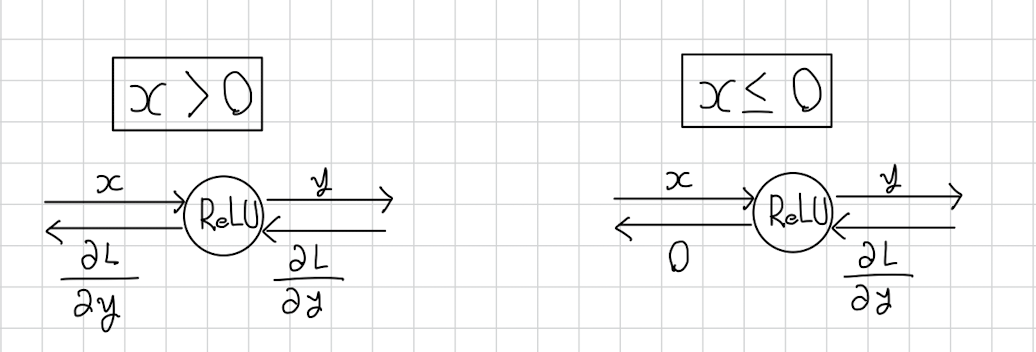

In [ ]:
class Relu:
  def __init__(self):
    self.mask = None
    
  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0
    return out
  
  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx

Relu 클래스는 mask라는 변수를 가지며, mask는 True/False로 구성된 넘파이 배열로, 순전파의 입력인 x의 원소 값이 0 이하인 인덱스는 True, 그 외(0보다 큰 원소)는 False로 유지한다.

In [20]:
import numpy as np
x = np.array([[1.0, -0.5], [-2.0, 3.0]])

print(x)

mask = (x <= 0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


### 5.5.2. Sigmoid 계층

$$
y = \frac{1}{1 + \exp(-x)}
$$

**1단계**

'/'노드는 $y = \frac{1}{x}$로 표현할 수 있다.

$$
\frac{\partial y}{\partial x} = -\frac{1}{x^2}
$$
$$
=-y^2
$$

식에 따르면 역전파 때는 상류에서 흘러온 값에 $-y^2$을 곱해서 하류로 전달한다.

**2단계**
'+'노드는 상류의 값을 그대로 하류로 흘린다.

**3단계**
'exp'노드는 $y = \exp(x)$로 표현할 수 있다.

$$
\frac{\partial y}{\partial x} = \exp(x)
$$

**4단계**
'x'노드는 순전파 때의 값을 서로 바꿔 곱한다.

$\frac{\partial L}{\partial y}y^2exp(-x)$는 다음과 같이 표현할 수 있다.

$$
\frac{\partial L}{\partial y}y^2exp(-x) = \frac{\partial L}{\partial y}y(1-y)
$$

시그모이드 계층의 역전파는 위와 같이 구할 수 있다.

파이썬으로 구현하면 다음과 같다.

In [ ]:
class Sigmoid:
  def __init__(self):
    self.out = None
    
  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    self.out = out
    return out
  
  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out
    return dx


## 5.6. Affine/Softmax 계층 구현하기

### 5.6.1. Affine 계층

신경망의 순전파 때 수행하는 행렬의 내적은 기하학에서는 어파인 변환(Affine Transformation)이라고 한다.

In [ ]:
X = np.random.rand(2) # 입력
W = np.random.rand(2, 3) # 가중치
B = np.random.rand(3) # 편향

print(X.shape)
print(W.shape)
print(B.shape)

Y = np.dot(X, W) + B
print(Y)

여기서 X, W, B는 각각 입력, 가중치, 편향을 뜻한다. 형상은 (2,) (2,3) (3,)이다.

뉴런의 가중치 합은 $Y=XW+B$로 나타낼 수 있다. 그리고 이 Y를 활성화 함수로 변환해 다음 층으로 전파하는 것이 신경망 순전파의 흐름이다.

역전파는 $dX = dY \cdot W^T$이고, $dW = X^T \cdot dY$, $dB = \sum dY$이다.

$$
\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}W^T
$$
$$
\frac{\partial L}{\partial W} = X^T\frac{\partial L}{\partial Y}
$$

$W^T$는 W의 전치행렬이다. 전치행렬은 W의 (i, j)원소를 (j, i)위치로 보내는 것이다.

$$
W = \begin{pmatrix} w_{11} & w_{21} & w_{31} \\ w_{12} & w_{22} & w_{32} \end{pmatrix}
$$
$$
W^T = \begin{pmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \\ w_{31} & w_{32} \end{pmatrix}
$$



### 5.6.2. 배치용 Affine 계층

데이터 N개를 묶어 순전파하는 경우를 생각해보자.

X의 형상은 (N, 2), W의 형상은 (2, 3)이다.

X와 W의 내적은 N개의 데이터에 대한 내적을 모두 한꺼번에 계산한다.

$$
Y = XW + B
$$

In [ ]:
# 순전파
import numpy as np
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])

B = np.array([1, 2, 3])

print(X_dot_W)
print(X_dot_W + B)

In [ ]:
# 역전파
import numpy as np
dY = np.array([[1, 2, 3], [4, 5, 6]])

print(dY)

dB = np.sum(dY, axis=0)
print(dB)

In [ ]:
# Affine 계층 구현
class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = B
    self.x = None
    self.dW = None
    self.db = None
    
  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self.b
    return out
  
  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)
    return dx
  

x = np.random.rand(3, 2) # 입력
W = np.random.rand(2, 3) # 가중치
B = np.random.rand(3) # 편향

affine = Affine(W, B)
out = affine.forward(x)
print(out)

dout = np.random.rand(3)
dx = affine.backward(dout)
print(dx)

### 5.6.3. Softmax-with-Loss 계층

소프트맥스 함수는 입력 값을 정규화하여 출력한다.

소프트맥스 함수의 출력을 교차 엔트로피 오차 함수로 정의하면 다음과 같다.

$$
y_k = \frac{\exp(a_k)}{\sum_{i=1}^n \exp(a_i)}
$$



In [ ]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c) # 오버플로 대책
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
    
  # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
  if t.size == y.size:
    t = t.argmax(axis=1)
    
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

class SoftmaxWithLoss:
  """Softmax-with-Loss 계층
  """
  def __init__(self):
    self.loss = None # 손실
    self.y = None # softmax의 출력
    self.t = None # 정답 레이블(원-핫 벡터)
    
  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)
    return self.loss
  
  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t) / batch_size
    return dx
  
x = np.random.rand(10, 2) # 입력
t = np.random.rand(10, 2) # 정답 레이블

softmax_with_loss = SoftmaxWithLoss()
loss = softmax_with_loss.forward(x, t)
print(loss)


## 5.7. 오차역전파법 구현하기

### 5.7.1. 신경망 학습의 전체 그림

**전제**
* 신경망에는 적응 가능한 가중치와 편향이 있다.
* 가중치와 편향ㅇ르 훈련 데이터에 적응 하도록 조정하는 과정을 '학습' 이라고 한다.

**1단계 - 미니배치**
* 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라고 하며, 이 미니배치의 손실 함수 값을 줄이는 것이 목표이다.
* 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.

**2단계 - 기울기 산출**
* 미니배치의 손실 한수 값을 줄이기 위해 각 가중치 매개번수의 기울기를 구한다.
* 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.

**3단계 - 매개변수 갱신**
* 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

**4단계 - 반복**
* 1~3단계를 반복한다.

### 5.7.2 오차적전파법을 적용한 신경망 구현하기

2층 신경망 TwoLayerNet을 구현해보자.

In [ ]:
from collections import OrderedDict

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
    

### 5.7.3. 오차역전파법으로 구한 기울기 검증하기

수치 미분과 오차역전파법으로 구한 기울기를 비교하여 오차역전파법을 제대로 구현했는지 확인할 수 있다.

수치 미분은 구현하기 쉽지만 계산 시간이 오래 걸린다.

오차역전파법은 구현하기 복잡하지만, 기울기를 효율적으로 구할 수 있다.

수치 미분의 결과와 오차역전파법의 결과를 비교하여 오차역전파법을 제대로 구현했는지 확인할 수 있다.



In [ ]:
# 기울기 확인

import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

TODO: fixme